Link to dataset:
https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who?search=alcohol+effects

In [1]:
# import packages
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
# import dataset
data = pd.read_csv('Life_Expectancy_Data.csv')

# clean column names
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# drop missing gdp values
data = data.dropna(subset=['gdp'])

data['gdp_per_capita'] = data['gdp']/data['population']

# rename HIV/AIDs column to make it usable
data = data.rename(columns={'hiv/aids': 'hiv_aids'})

# rename thinness 1-19 column to make it usable
data = data.rename(columns={'thinness__1-19_years': 'thinness_1_19_years'})

# rename thinness 5-9 column to make it usable
data = data.rename(columns={'thinness_5-9_years': 'thinness_5_9_years'})

data = data.loc[data.gdp >= 108]

np.random.seed(3)
train = data.sample(round(data.shape[0]*0.8)) # 80% training, 20% test
test = data.drop(train.index)

/var/folders/p0/ppz0yj5s4qz65pfjbd7vtldh0000gn/T/ipykernel_55049/764115080.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
/var/folders/p0/ppz0yj5s4qz65pfjbd7vtldh0000gn/T/ipykernel_55049/764115080.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


In [78]:
data.corr()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,...,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,gdp_per_capita
year,1.000000,0.162332,-0.068897,-0.037509,-0.049091,0.035455,0.089311,-0.093599,0.097654,-0.042537,...,0.081448,0.134202,-0.141618,0.101620,0.017359,-0.050644,-0.054651,0.233216,0.204482,0.008695
life_expectancy,0.162332,1.000000,-0.688458,-0.184129,0.386706,0.408237,0.240160,-0.147103,0.578542,-0.209681,...,0.183088,0.470466,-0.567730,0.461455,-0.022628,-0.480921,-0.476778,0.735158,0.755293,0.059383
adult_mortality,-0.068897,-0.688458,1.000000,0.066432,-0.178217,-0.253988,-0.142424,0.012606,-0.384456,0.081278,...,-0.079259,-0.253656,0.536975,-0.296049,-0.013180,0.296772,0.305205,-0.461958,-0.450942,-0.047054
infant_deaths,-0.037509,-0.184129,0.066432,1.000000,-0.105102,-0.090889,-0.227924,0.521261,-0.228265,0.996623,...,-0.127250,-0.169153,0.015736,-0.108427,0.556791,0.483403,0.489793,-0.152920,-0.203257,-0.019259
alcohol,-0.049091,0.386706,-0.178217,-0.105102,1.000000,0.380379,0.069455,-0.031786,0.340192,-0.101209,...,0.292360,0.216684,-0.040657,0.354712,-0.035582,-0.419100,-0.406711,0.459385,0.558376,-0.014493
percentage_expenditure,0.035455,0.408237,-0.253988,-0.090889,0.380379,1.000000,0.021458,-0.062058,0.250049,-0.093486,...,0.207242,0.156624,-0.111346,0.899373,-0.025993,-0.270700,-0.273323,0.395516,0.399500,0.030592
hepatitis_b,0.089311,0.240160,-0.142424,-0.227924,0.069455,0.021458,1.000000,-0.121469,0.147821,-0.237748,...,0.038072,0.617958,-0.110590,0.083903,-0.123731,-0.110555,-0.120010,0.196175,0.230929,0.037788
measles,-0.093599,-0.147103,0.012606,0.521261,-0.031786,-0.062058,-0.121469,1.000000,-0.172425,0.528549,...,-0.092809,-0.124742,0.028484,-0.076466,0.265858,0.236505,0.232467,-0.138286,-0.146281,-0.015423
bmi,0.097654,0.578542,-0.384456,-0.228265,0.340192,0.250049,0.147821,-0.172425,1.000000,-0.238207,...,0.200858,0.282482,-0.244820,0.301557,-0.072326,-0.531670,-0.540278,0.527781,0.559680,-0.019586
under-five_deaths,-0.042537,-0.209681,0.081278,0.996623,-0.101209,-0.093486,-0.237748,0.528549,-0.238207,1.000000,...,-0.127544,-0.189879,0.027625,-0.112081,0.544432,0.485033,0.490275,-0.171507,-0.219288,-0.019762


In [36]:
ols_object = smf.ols(formula = 'life_expectancy~schooling*income_composition_of_resources+bmi*adult_mortality*hiv_aids+np.log(gdp)+thinness_1_19_years', data=train)
model = ols_object.fit()

# returning numerical/statistical analysis
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     770.1
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:18:05   Log-Likelihood:                -5046.8
No. Observations:                1829   AIC:                         1.012e+04
Df Residuals:                    1816   BIC:                         1.019e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [37]:
#Computing RMSE on test data
pred_life = model.predict(test)
np.sqrt(((test.life_expectancy - pred_life)**2).mean())

3.897850516220806

Text(0, 0.5, 'Residuals')

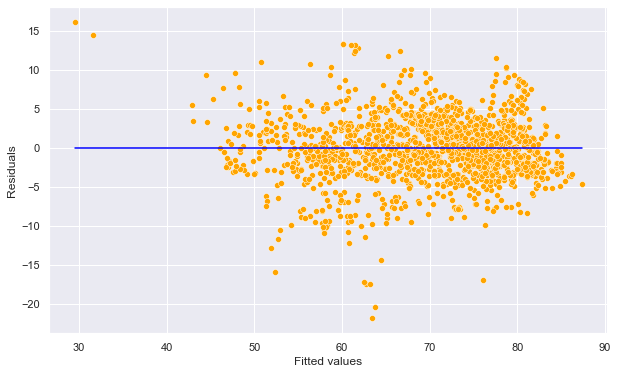

In [39]:
#Plotting residuals vs fitted values
sns.set(rc={'figure.figsize':(10,6)})
sns.scatterplot(x = (model.fittedvalues), y=(model.resid),color = 'orange')
sns.lineplot(x = [model.fittedvalues.min(),model.fittedvalues.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')